In [294]:
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import cv2
import random
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Input
from tensorflow.keras.layers import Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

import tensorflow as tf
import sklearn

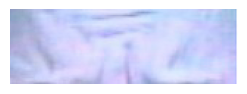

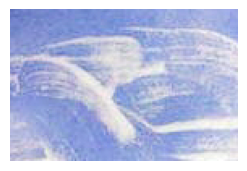

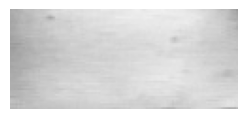

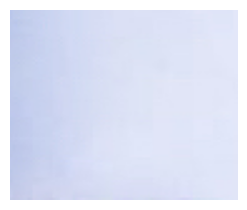

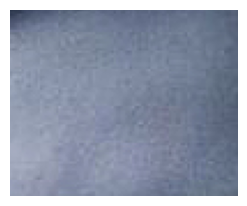

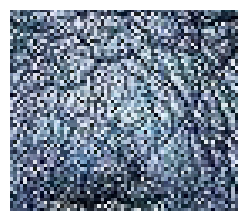

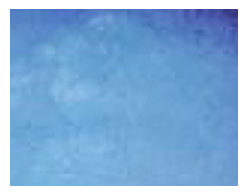

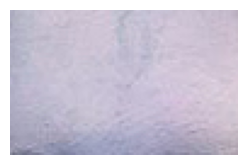

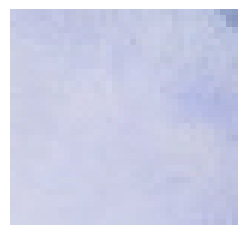

In [295]:
images = glob("dataset/**/**")
for i in range(9):
    image = random.choice(images)
    plt.figure(figsize=(10,10))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image))
    plt.axis("off")

In [296]:
no_wrinkled = glob("dataset/NoWrinkles/**")
wrinkled = glob("dataset/Wrinkled/**")

In [297]:
no_wrinkles = []
wrinkles = []

In [298]:
def append_wrinkle(img):
    
    for image in img:
        image = cv2.imread(image)
        if (image is not None):
            resized_image = cv2.resize(image, (64, 64))
            wrinkles.append(resized_image)

In [299]:
append_wrinkle(wrinkled)

In [300]:
def append_nowrinkles(img):
    for image in img:
        image = cv2.imread(image)
        if (image is not None):
            resized_image = cv2.resize(image, (64, 64))
            no_wrinkles.append(resized_image)

In [301]:
append_nowrinkles(no_wrinkled)

In [302]:
print(len(no_wrinkles))
print(len(wrinkles))

374
382


In [303]:
wrinkles_labels = [ 1 for i in range(len(wrinkles)) ]
no_wrinkles_labels = [ 0 for i in range(len(no_wrinkles)) ]

In [304]:
print(len(wrinkles_labels))
print(len(no_wrinkles_labels))

382
374


In [305]:
dataset = wrinkles + no_wrinkles
x = np.array(dataset)
x.shape

(756, 100, 100, 3)

In [306]:
label_dataset = wrinkles_labels + no_wrinkles_labels
y = np.array(label_dataset)
y.shape

(756,)

In [307]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [308]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(529, 100, 100, 3)
(227, 100, 100, 3)
(529,)
(227,)


In [309]:
def Convolution(input_tensor, filters, kernel_size):
    x = Conv2D(filters = filters, kernel_size = kernel_size, padding = "same")(input_tensor)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size = (2,2))(x)
    
    return x

In [310]:
def Dense_f(input_tensor, nodes):
    x = Dense(nodes)(input_tensor)
    x = Activation('relu')(x)
    
    return x

In [311]:
def model_fer(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs,32,(3,3))
    conv_2 = Convolution(conv_1,64,(3,3))
    conv_3 = Convolution(conv_2,128,(3,3))
    flatten = Flatten()(conv_3)
    
    dense_1 = Dense_f(flatten,96)

    dense_2  = Dense(256, activation="relu")(dense_1)
    output  = Dense(1, activation="sigmoid")(dense_2)
    model  =  Model(inputs=[inputs],outputs = [output])

    return model


In [312]:
model = model_fer((64,64,3))
model.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_35 (Conv2D)          (None, 100, 100, 32)      896       
                                                                 
 activation_47 (Activation)  (None, 100, 100, 32)      0         
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 50, 50, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 50, 50, 64)        18496     
                                                                 
 activation_48 (Activation)  (None, 50, 50, 64)        0         
                                                          

 max_pooling2d_36 (MaxPoolin  (None, 25, 25, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 25, 25, 128)       73856     
                                                                 
 activation_49 (Activation)  (None, 25, 25, 128)       0         
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 12, 12, 128)      0         
 g2D)                                                            
                                                                 
 flatten_12 (Flatten)        (None, 18432)             0         
                                                                 
 dense_36 (Dense)            (None, 96)                1769568   
                                                                 
 activation_50 (Activation)  (None, 96)                0         
          

In [313]:
model.compile(loss=['binary_crossentropy'] , optimizer = 'adam' , metrics =["accuracy"])

In [314]:
history = model.fit(x_train, y_train, epochs=100)

Epoch 1/100
17/17 [==============================] - 5s 229ms/step - loss: 11.0927 - accuracy: 0.5142
Epoch 2/100
17/17 [==============================] - 4s 229ms/step - loss: 0.7604 - accuracy: 0.5614
Epoch 3/100
17/17 [==============================] - 4s 250ms/step - loss: 0.6509 - accuracy: 0.6030
Epoch 4/100
17/17 [==============================] - 4s 249ms/step - loss: 0.7075 - accuracy: 0.5747
Epoch 5/100
17/17 [==============================] - 4s 220ms/step - loss: 0.6600 - accuracy: 0.6030
Epoch 6/100
17/17 [==============================] - 4s 219ms/step - loss: 0.5860 - accuracy: 0.6711
Epoch 7/100
17/17 [==============================] - 4s 246ms/step - loss: 0.6076 - accuracy: 0.6749
Epoch 8/100
17/17 [==============================] - 4s 225ms/step - loss: 0.5960 - accuracy: 0.7278
Epoch 9/100
17/17 [==============================] - 4s 225ms/step - loss: 0.7507 - accuracy: 0.6049
Epoch 10/100
17/17 [==============================] - 4s 220ms/step - loss: 0.6859 - accur

In [315]:
model.evaluate(x_test,y_test)

8/8 [==============================] - 1s 61ms/step - loss: 0.6515 - accuracy: 0.6300


[0.6514691114425659, 0.6299559473991394]

In [316]:
y_test

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0])

In [317]:
model.predict(x_train)

17/17 [==============================] - 1s 70ms/step


array([[0.46178982],
       [0.5311625 ],
       [0.52260935],
       [0.5795309 ],
       [0.5159946 ],
       [0.50599796],
       [0.4649282 ],
       [0.46137366],
       [0.5653151 ],
       [0.42742983],
       [0.5520967 ],
       [0.49841845],
       [0.46765858],
       [0.5019427 ],
       [0.50997925],
       [0.9918982 ],
       [0.5224962 ],
       [0.4989611 ],
       [0.45348927],
       [0.48217556],
       [0.48242158],
       [0.5651487 ],
       [0.48073664],
       [0.5249014 ],
       [0.48835084],
       [0.5002086 ],
       [0.5224849 ],
       [0.46586913],
       [0.60327035],
       [0.47875804],
       [0.4821546 ],
       [0.48171404],
       [0.5430679 ],
       [0.51145524],
       [0.46617633],
       [0.55071914],
       [0.48749048],
       [0.4538367 ],
       [0.4717659 ],
       [0.50032914],
       [0.43552017],
       [0.501906  ],
       [0.49995747],
       [0.4605049 ],
       [0.53062475],
       [0.48627207],
       [0.56152326],
       [0.538

In [318]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")